# Looking for correlation in synthetic data
### We want to investigate the correlation of two variables when we believe there is some kind of relationship between them.

### Correlation Coefficient

* A common way of measuring correlation is the Pearson correlation coefficient.

* This coefficient, denoted by $r$, is a value from $-1$ to $+1$.

* A value of $+1$ indicates that the variables have a perfect positive linear relationship, a value of $-1$ indicates a perfect negative linear relationship, while a value of $0$ indicates no linear correlation.

* To study the correlation we will use the [SciPy](https://www.scipy.org/) library.

In [1]:
import scipy.stats.stats as stats

import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style()

* Suppose we have a set of observations of two variables `x` and `y`.

* Our data is *artificial*, i.e. we construct it ourselves so that it is of the form:

$$y = 0{,}8 x + 0{,}36 \epsilon $$

In [2]:
np.random.seed(42)
r = 0.8
x = np.random.normal(size=100)
y = r*x + np.sqrt(1-r**2)*np.random.normal(size=100)
df_1 = pd.DataFrame({'x': x, 'y': y})

In [3]:
df_1

,x,y
0,0.496714,-0.451851
1,-0.138264,-0.362999
2,0.647689,0.312522
3,1.523030,0.737058
4,-0.234153,-0.284094
...,...,...
95,-1.463515,-0.939622
96,0.296120,-0.293418
97,0.261055,0.301079
98,0.005113,0.039016


* If we capture them diagrammatically they will have the [following form](https://upload.wikimedia.org/wikipedia/commons/6/67/Spearman_fig3.svg):

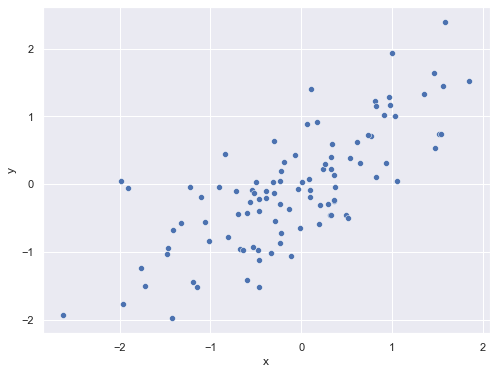

In [4]:
sns.set(rc={"figure.figsize":(8, 6)})
_ = sns.scatterplot(x='x', y='y', data=df_1)

* To calculate the Pearson coefficient we use the `pearsonr()` function from the `scipy.stats.stats` library.

* The function returns two values: the coefficient and its significance value (p-value).

In [5]:
stats.pearsonr(df_1.x, df_1.y)

(0.7529004259351295, 1.6598002643730582e-19)

* The Pearson coefficient decreases as we move away from the linear relationship.

* Let's look at the following synthetic data example:

$$y = 0{,}6 x + 0{,}64 \epsilon $$

In [6]:
np.random.seed(42)
r = 0.6
x = np.random.normal(size=100)
y = r*x + np.sqrt(1-r**2)*np.random.normal(size=100)
df_2 = pd.DataFrame({'x': x, 'y': y})

In [7]:
df_2

,x,y
0,0.496714,-0.834268
1,-0.138264,-0.419475
2,0.647689,0.114442
3,1.523030,0.271996
4,-0.234153,-0.269521
...,...,...
95,-1.463515,-0.569855
96,0.296120,-0.529414
97,0.261055,0.279613
98,0.005113,0.049635


* Diagrammatically they appear as follows:

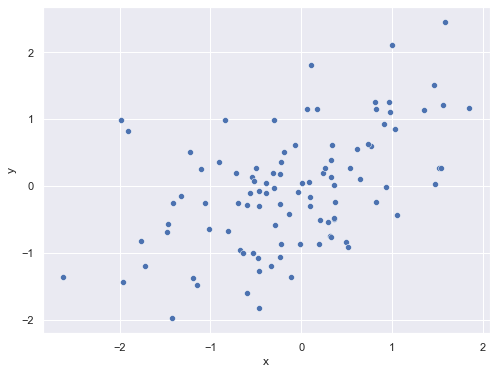

In [8]:
_ = sns.scatterplot(x='x', y='y', data=df_2)

* With this data we get:

In [9]:
stats.pearsonr(df_2.x, df_2.y)

(0.5038156484709347, 9.120853831670732e-08)

* The Pearson coefficient needs attention when our data has outliers, such as [the following](https://upload.wikimedia.org/wikipedia/commons/6/67/Spearman_fig3.svg):

In [10]:
np.random.seed(42)
r = 0.8
x = np.random.normal(size=100)
y = r*x + np.sqrt(1-r**2)*np.random.normal(size=100)
ii = np.argsort(-x)
x[ii[0:5]] *= 5
df_3 = pd.DataFrame({'x': x, 'y': y})

In [11]:
df_3

,x,y
0,0.496714,-0.451851
1,-0.138264,-0.362999
2,0.647689,0.312522
3,7.615149,0.737058
4,-0.234153,-0.284094
...,...,...
95,-1.463515,-0.939622
96,0.296120,-0.293418
97,0.261055,0.301079
98,0.005113,0.039016


* Indeed, we can see the outliers on the right:

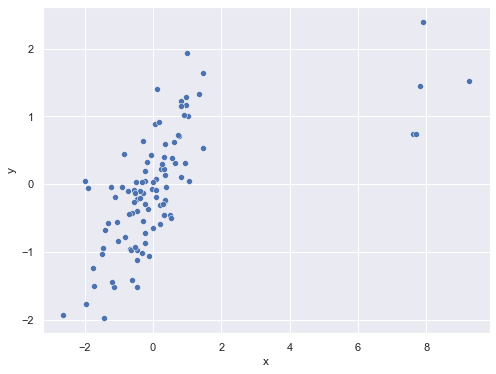

In [12]:
_ = sns.scatterplot(x='x', y='y', data=df_3)

* Then we get:

In [13]:
stats.pearsonr(df_3.x, df_3.y)

(0.6200894823297651, 5.996001353052288e-12)

* Remember that the Pearson coefficient measures a *linear* correlation in the data.

* This means that the data may have a clear relationship, which nevertheless cannot be detected by the Pearson coefficient, as you can see in the [image below](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient #/media/File:Correlation_examples2.svg).

<img src="https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg" width="800" />

* If the correlation is not linear, but is nevertheless increasing or decreasing, then another coefficient, Spearman's correlation coefficient, may be more appropriate.

* This coefficient is denoted by $\rho$ and measures how well two variables have an increasing or decreasing (but not necessarily linear) relationship.

* To calculate the Pearson coefficient we use the `spearman()` function from the `scipy.stats.stats` library, which again returns the coefficient and the significance value.

* Suppose our data is as [below](https://commons.wikimedia.org/wiki/File:Spearman_fig1.svg):

$$ y = \operatorname{sgn}\left(\ln\frac{x}{1-x}\right) \left|\,\ln\frac{x}{1-x}\,\right|^ {1{,}4} $$

In [14]:
np.random.seed(42)
x = np.random.uniform(size=100)
y = np.log(x/(1-x))
y = np.sign(y)*(np.abs(y)**1.4)
df_4 = pd.DataFrame({'x': x, 'y': y})

In [15]:
df_4

,x,y
0,0.374540,-0.392567
1,0.950714,4.567958
2,0.731994,1.006674
3,0.598658,0.277140
4,0.156019,-2.081504
...,...,...
95,0.493796,-0.005658
96,0.522733,0.034883
97,0.427541,-0.178365
98,0.025419,-6.118256


* We can see that the data has a genuine upward correlation, but not a linear one:

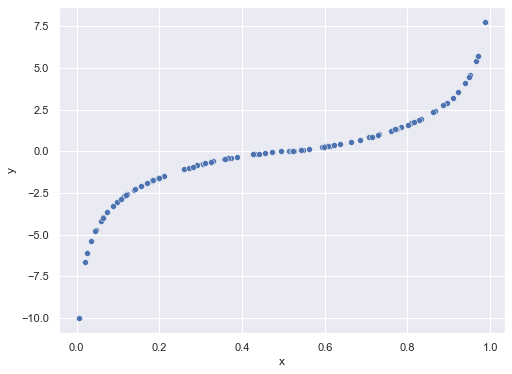

In [16]:
_ = sns.scatterplot(x='x', y='y', data=df_4)

* To see what the Pearson and Spearman coefficients give us:

In [17]:
print('Pearson', stats.pearsonr(df_4.x, df_4.y))
print('Spearman', stats.spearmanr(df_4.x, df_4.y))

Pearson (0.9154291577976971, 1.6129079055537388e-40)
Spearman SpearmanrResult(correlation=0.9999999999999999, pvalue=0.0)


* Spearman's coefficient may be less sensitive to outliers.

* Going back to the relevant example:

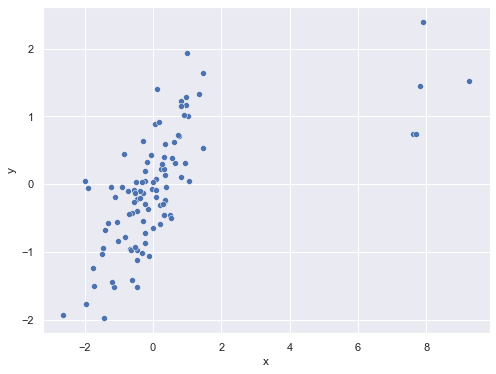

In [18]:
_ = sns.scatterplot(x='x', y='y', data=df_3)

* We see that:

In [19]:
print('Pearson', stats.pearsonr(df_3.x, df_3.y))
print(stats.spearmanr(df_3.x, df_3.y))

Pearson (0.6200894823297651, 5.996001353052288e-12)
SpearmanrResult(correlation=0.7201200120012, pvalue=3.0751702980521144e-17)


* Let's look at another [data example](the_functional_art.csv), from [post](http://www.thefunctionalart.com/2016/08/download-datasaurus-never-trust-summary.html) by [Alberto Cairo ](http://albertocairo.com/).

In [20]:
import pandas as pd

df_ac = pd.read_csv('the_functional_art.csv', header=None, names=['x', 'y'])
df_ac

,x,y
0,55.3846,97.1795
1,51.5385,96.0256
2,46.1538,94.4872
3,42.8205,91.4103
4,40.7692,88.3333
...,...,...
137,39.4872,25.3846
138,91.2821,41.5385
139,50.0000,95.7692
140,47.9487,95.0000


* This data has the following basic statistics:

In [21]:
df_ac.describe()

,x,y
count,142.000000,142.000000
mean,54.263273,47.832253
std,16.765142,26.935403
min,22.307700,2.948700
25%,44.102600,25.288450
50%,53.333300,46.025600
75%,64.743600,68.525675
max,98.205100,99.487200


* There seems to be no correlation between `x` and `y`:

In [22]:
print('Pearson', stats.pearsonr(df_ac.x, df_ac.y))
print(stats.spearmanr(df_ac.x, df_ac.y))

Pearson (-0.06447185270095164, 0.44589659802470616)
SpearmanrResult(correlation=-0.06510904080429955, pvalue=0.44140461256177965)


* But is it really so?

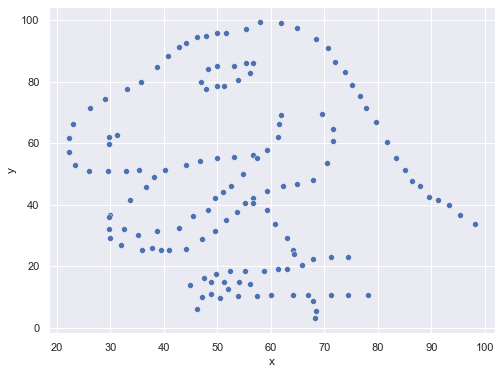

In [23]:
_ = sns.scatterplot(x='x', y='y', data=df_ac)

* Bottom line: don't just rely on metrics.

* Visualize your data as much as you can in your analysis.